In [9]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
df = pd.read_csv('accident.csv')

In [11]:
#  basic information and inspection
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Head:
   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0   56  Female             27.0          No            No         1
1   69  Female             46.0          No           Yes         1
2   46    Male             46.0         Yes           Yes         0
3   32    Male            117.0          No           Yes         0
4   60  Female             40.0         Yes           Yes         0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB

Missing Values:
Age         

In [12]:
# Summary statistics of dataset
print("\nSummary Statistics:")
print(df.describe())

# Convert categorical variables to numerical for correlation analysis
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


Summary Statistics:
             Age  Speed_of_Impact   Survived
count  200.00000       197.000000  200.00000
mean    43.42500        70.441624    0.50500
std     14.94191        30.125298    0.50123
min     18.00000        20.000000    0.00000
25%     31.00000        43.000000    0.00000
50%     43.50000        71.000000    1.00000
75%     56.00000        95.000000    1.00000
max     69.00000       119.000000    1.00000


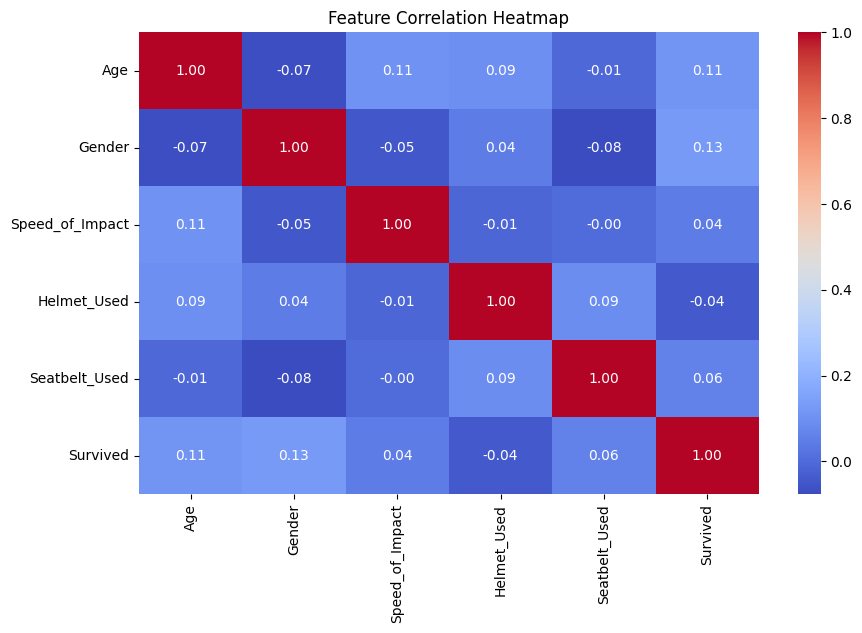

In [13]:
# Correlation heatmap for easy lookout
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

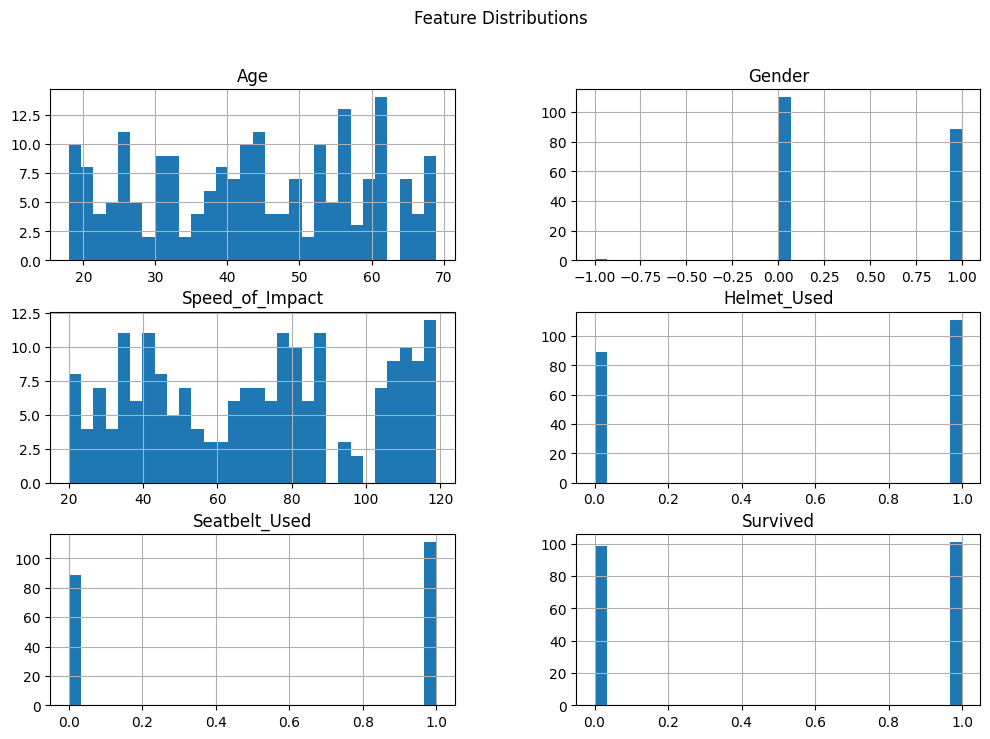

In [14]:
# Distribution of numerical columns for different features
df_encoded.hist(figsize=(12, 8), bins=30)
plt.suptitle('Feature Distributions')
plt.show()

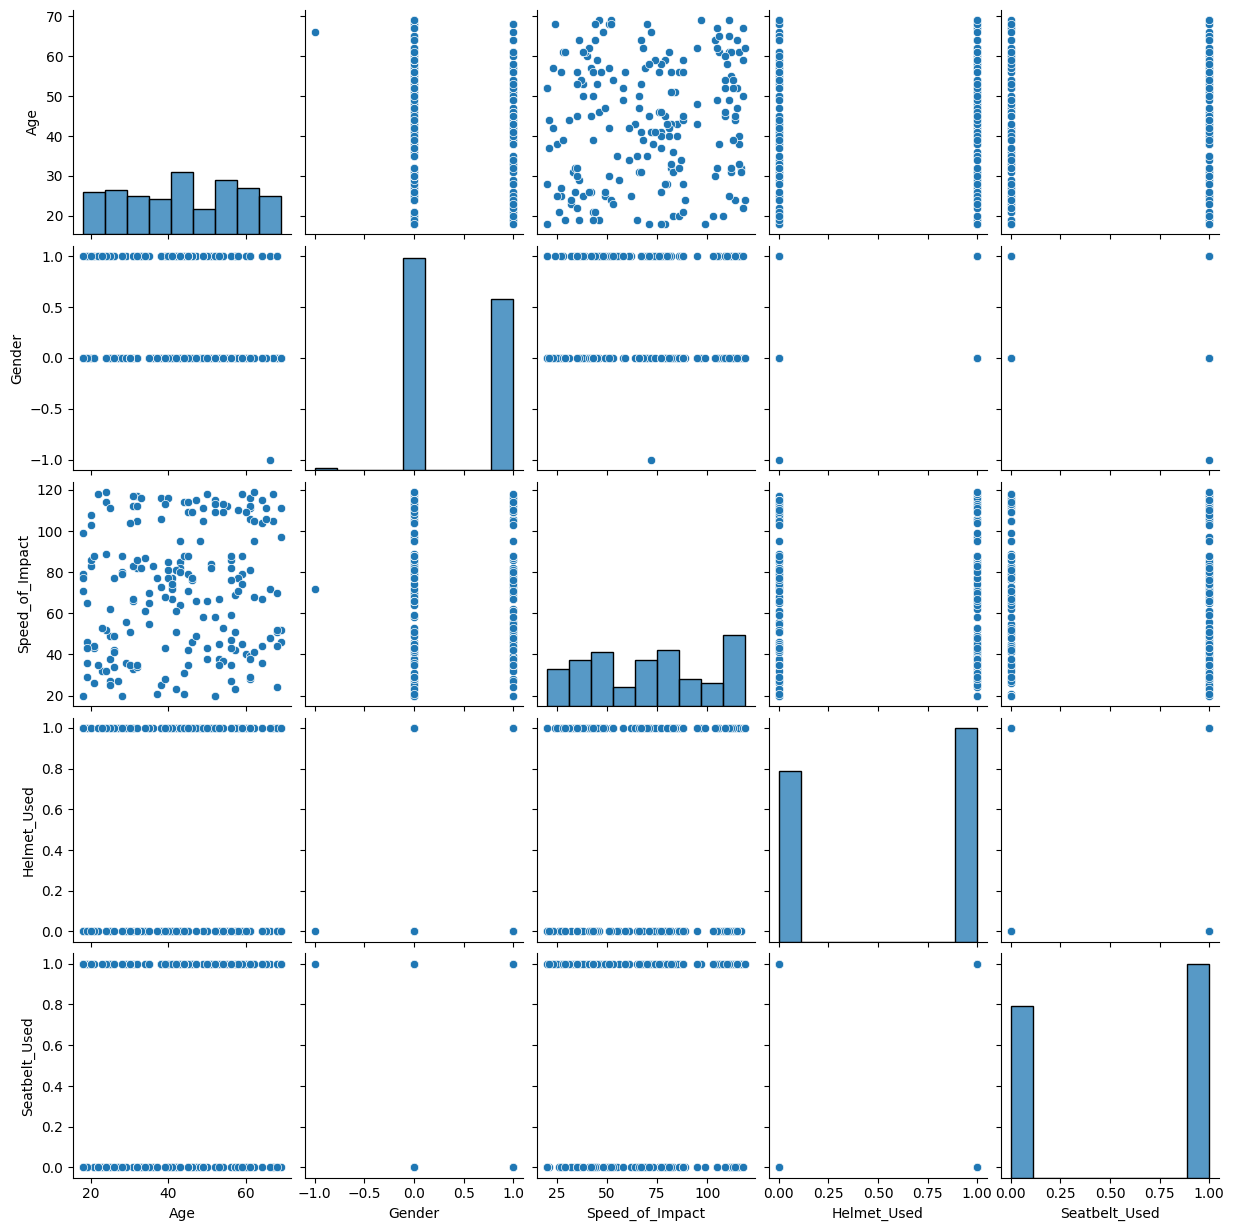

In [15]:
# Pairplot for first few numeric columns 
numeric_cols = df_encoded.select_dtypes(include=['number']).columns[:5]
sns.pairplot(df_encoded[numeric_cols])
plt.show()

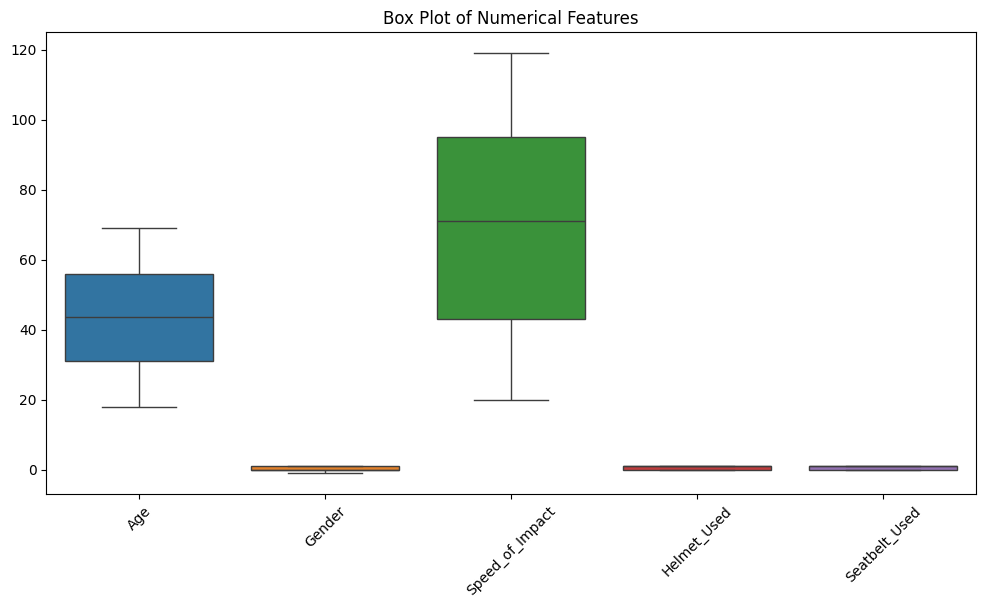

In [16]:
# Box plots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded[numeric_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()

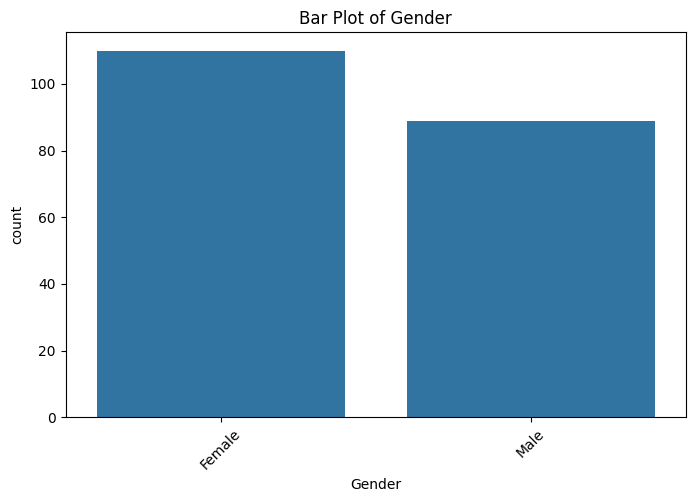

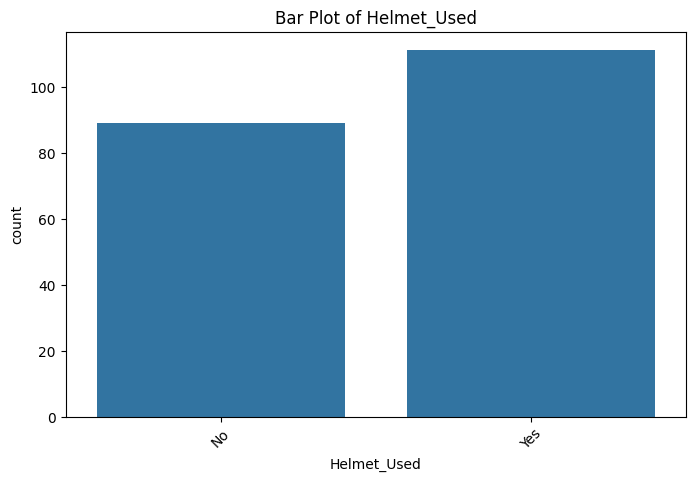

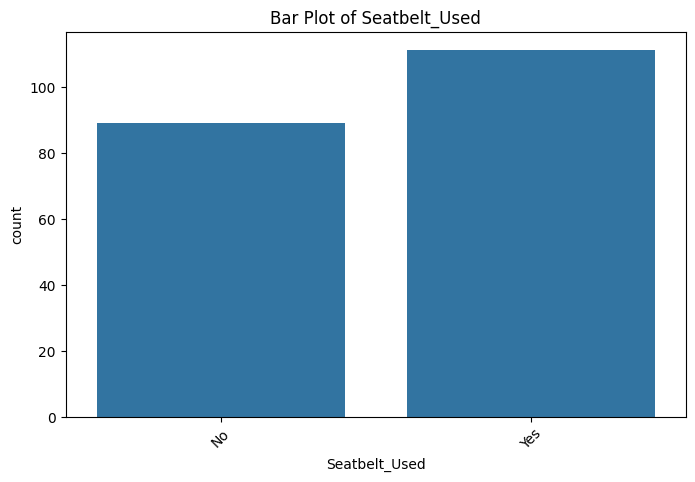

In [17]:
# Bar plot for categorical features columns
categorical_cols = df.select_dtypes(include=['object']).columns[:3]  
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Bar Plot of {col}")
    plt.show()

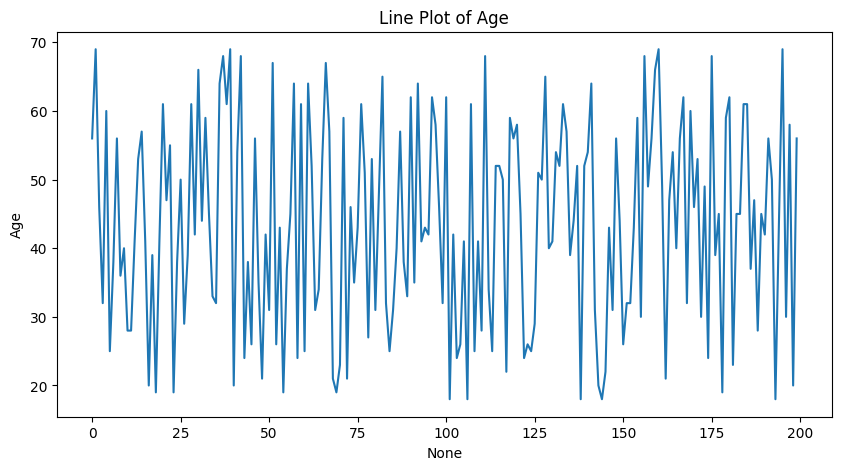

In [18]:
# Line plot for a sample Age Column
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df.index, y=df_encoded[numeric_cols[0]])
    plt.title(f"Line Plot of {numeric_cols[0]}")
    plt.show()

In [19]:
# Import Library
import pandas as pd
import numpy as np
from tkinter import Tk
from tkinter.filedialog import asksaveasfilename

In [20]:
# Data Filtering
def filter_data(df):
    
    # Remove rows where 'Age' is less than 18
    if 'Age' in df.columns:
        df = df[pd.to_numeric(df['Age'], errors='coerce').fillna(np.nan) >= 18]

    # Keep only rows with 'Severe' or 'Fatal' Accident_Severity
    if 'Accident_Severity' in df.columns:
        df = df[df['Accident_Severity'].isin(['Severe', 'Fatal'])]

    # Remove outliers from numerical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df = df.dropna(subset=numeric_cols)  # Drop rows with NaN in numerical columns
    
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering out the outliers
    df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

    print("\nData shape after filtering:", df.shape)
    return df

In [ ]:
# filtering the function
df_filtered = filter_data(df)
root = Tk()
root.withdraw() 

In [ ]:
# saving the filtered data in a local storage
file_path = asksaveasfilename(defaultextension=".csv", 
                              filetypes=[("CSV files", "*.csv")],
                              title="Choose location to save the filtered data")

# Save the filtered dataset if a path is selected
if file_path:
    df_filtered.to_csv(file_path, index=False)
    print(f"Filtered data saved as '{file_path}'")
else:
    print("File save operation was cancelled.")